In [1]:
import pandas as pd
import numpy as np
import os
import json

In [2]:
glove_path='../glove.6B/glove.6B.50d.txt'

def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model


glove_model=load_glove_model(glove_path)

Loading Glove Model
400001 words loaded!


In [3]:
glove_model['hello']

array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [4]:
from nltk.tokenize import sent_tokenize,word_tokenize




def to_embedding(sentence):
    total_embed=np.zeros(50)
    word_list=word_tokenize(sentence)
    for word in word_list:
        if word in glove_model:
            embed=glove_model[word]
        elif word.lower() in glove_model:
            embed=glove_model[word.lower()]
        else:
            embed=np.zeros(50)
        total_embed+=embed
    return total_embed

def compare_ans(pred,correct):
    if (correct=='A' and pred==0) or (correct=='B' and pred==1) or (correct=='C' and pred==2) or (correct=='D' and pred==3):
        return True
    return False

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

def generate_answer(answers_list,options_list,questions_list,article,question_num):
    sentence_embed_list=[]
    correct=0
    wrong=0
    
    sentence_list = sent_tokenize(article)
    for i in range(len(sentence_list)):
        sentence_group=sentence_list[i]
        sentence_embed=to_embedding(sentence_group)
        sentence_embed_list.append(sentence_embed)
    
    
    
    
    for i in range(question_num):
        similarity_list=[]
        question=questions_list[i]
        for option in options_list[i]:
            option_embed=to_embedding(option+question)
            max_similarity=0
            for sentence_embed in sentence_embed_list:
                similarity=cosine_similarity(np.reshape(option_embed,(1,-1)),np.reshape(sentence_embed,(1,-1)))[0][0]
                max_similarity=max(abs(similarity),max_similarity)
                
            similarity_list.append(max_similarity)
        
        max_value=max(similarity_list)
        max_idx=similarity_list.index(max_value)
        
        
#         print(max_idx,answers_list[i])
        if compare_ans(max_idx,answers_list[i]):
            correct+=1
        else:
            wrong+=1
    return correct,wrong

In [6]:
train_middle_data_path='../data/test/middle'
train_high_data_path='../data/test/high'


total_correct=0
total_wrong=0

for filename in os.listdir(train_middle_data_path):
    file_path=train_middle_data_path+"/"+filename
    with open(file_path,'r') as f:
        json_text=json.loads(f.read())
        correct_answers=json_text['answers']
        options_list=json_text['options']
        questions_list=json_text['questions']
        article=json_text['article']
        correct,wrong=generate_answer(correct_answers,options_list,questions_list,article,len(correct_answers))
        total_correct+=correct
        total_wrong+=wrong

In [7]:
total_correct

433

In [8]:
total_wrong

1003

In [10]:
(total_correct)/(total_correct+total_wrong)

0.30153203342618384

In [11]:
train_middle_data_path='../data/test/middle'
train_high_data_path='../data/test/high'


total_correct=0
total_wrong=0

for filename in os.listdir(train_high_data_path):
    file_path=train_high_data_path+"/"+filename
#     print(file_path)
    with open(file_path,'r') as f:
        
        json_text=json.loads(f.read())
        correct_answers=json_text['answers']
        options_list=json_text['options']
        questions_list=json_text['questions']
        article=json_text['article']
        correct,wrong=generate_answer(correct_answers,options_list,questions_list,article,len(correct_answers))
        total_correct+=correct
        total_wrong+=wrong

In [12]:
(total_correct)/(total_correct+total_wrong)

0.2718696397941681

In [31]:
from numpy import random

correct_ans=0
wrong_ans=0

test_middle_data_path='../data/test/middle'
test_high_data_path='../data/test/high'


for filename in os.listdir(test_middle_data_path):
    file_path=train_middle_data_path+"/"+filename
    with open(file_path,'r') as f:
        json_text=json.loads(f.read())
        correct_answers=json_text['answers']
        options_list=json_text['options']
        questions_list=json_text['questions']
        article=json_text['article']

        for i in range(len(questions_list)):
            correct_answer=correct_answers[i]
            
            pred=random.randint(1,5)
#             print(correct_ans,pred)
            if correct_answer=='A' and pred==1 or correct_answer=='B' and pred==2 or correct_answer=='C' and pred==3 or correct_answer=='D' and pred==4:
                correct_ans+=1
            else:
                wrong_ans+=1
                

In [33]:
correct_ans/(correct_ans+wrong_ans)

0.2562674094707521

In [34]:
from numpy import random

correct_ans=0
wrong_ans=0

test_middle_data_path='../data/test/middle'
test_high_data_path='../data/test/high'


for filename in os.listdir(test_high_data_path):
    file_path=train_high_data_path+"/"+filename
    with open(file_path,'r') as f:
        json_text=json.loads(f.read())
        correct_answers=json_text['answers']
        options_list=json_text['options']
        questions_list=json_text['questions']
        article=json_text['article']

        for i in range(len(questions_list)):
            correct_answer=correct_answers[i]
            
            pred=random.randint(1,5)
#             print(correct_ans,pred)
            if correct_answer=='A' and pred==1 or correct_answer=='B' and pred==2 or correct_answer=='C' and pred==3 or correct_answer=='D' and pred==4:
                correct_ans+=1
            else:
                wrong_ans+=1
                
correct_ans/(correct_ans+wrong_ans)

0.2567181246426529

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

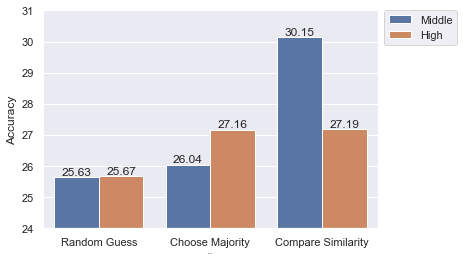

In [51]:
accuracy=[25.63,25.67,26.04,27.16,30.15,27.19]
method=['Random Guess','Random Guess','Choose Majority','Choose Majority','Compare Similarity','Compare Similarity']
category=['Middle','High','Middle','High','Middle','High']
data=list(zip(accuracy,method,category))

choices_df=pd.DataFrame(data,columns=['Accuracy','Method','Category'])
ax = sns.barplot(x="Method", y="Accuracy", hue="Category", data=choices_df)
ax.set_ylim(24,31)
sns.set(font_scale = 1)

ax.set_xlabel("Method",size=1.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
for container in ax.containers:
    ax.bar_label(container)